## Training Models

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Linear Regression

- Earlier we looked at a simple regression model of life satisfaction:

$\text{life_satisfaction} = θ_0 + θ_1 × \text{GDP_per_capita}.$
${life_satisfaction} = θ_0 + θ_1 × {GDP_per_capita}$


This model is just a linear function of the input feature GDP_per_capita. $θ_0$ and $θ_1$ are
the model’s parameters.

- More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*).

**Linear Regression model prediction**

$\hat{y} = θ_0 + θ_1 x_1 + θ_2 x_2 + ⋯ + θ_n x_n $

$\hat{y}$ is the *predicted value*

$x_i$ is the i$^{th}$ *feature* 

$n$ is the number of features

$θ_j$ is the j$^{th}$ *model parameter*


This can be written much more concisely using a vectorized form:

**Linear Regression model prediction (vectorized form)**

$\hat{y} = h_θ(\mathbf{x}) = θ^T \cdot \mathbf{x} $

• $θ$ is the model’s parameter vector, containing the bias term $θ_0$ and the feature
weights $θ_1$ to $θ_n$.

• $θ^T$ is the transpose of $θ$ (a row vector instead of a column vector).

• $\mathbf{x}$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to $1$.

• $θ^T\cdot \mathbf{x}$ is the dot product of $θ^T$ and $\mathbf{x}$.

• $h_θ$ is the hypothesis function, using the model parameters $θ$.

#### How do we train a model?

- Training a model means setting its parameters so that the model best fits the training set.

- For this purpose, we first need a measure of how well (or poorly) the model fits the training data.

- The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore,
to train a Linear Regression model, you need to find the value of $θ$ that minimizes the RMSE.

- In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

#### MSE cost function for a Linear Regression model

$\mathrm{MSE}(\mathbf{X}, h_{\theta})= \frac{1}{m} \sum_{i=1}^m \left(y^{(i)} -\theta^T\cdot \mathbf{x}^{(i)}\right)^2$

#### The Normal Equation

- To find the value of $θ$ that minimizes the cost function, there is a ***closed-form solution*** (a mathematical equation that gives the result directly).

- This is called the Normal Equation

$\hat{\theta} = (\mathbf{X}^T\cdot\mathbf{X})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$

• $\hat{θ}$ is the value of $θ$ that minimizes the cost function.

• $\mathbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

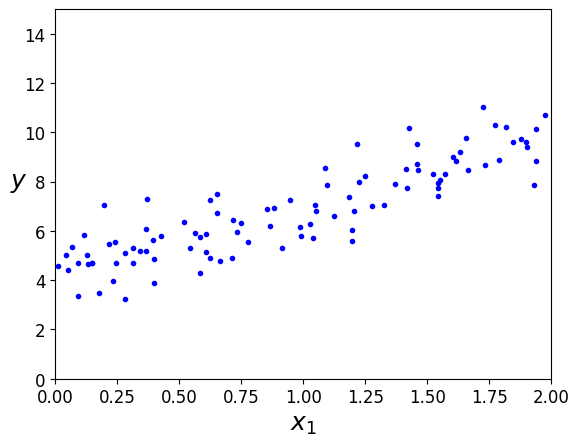

In [4]:
plt.plot(X, y, "b.");
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.axis([0, 2, 0, 15]);
plt.show();

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ (X_b.T).dot(y)
theta_best


array([[4.21509616],
       [2.77011339]])

In [6]:
# Now you can make predictions using theta_best:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

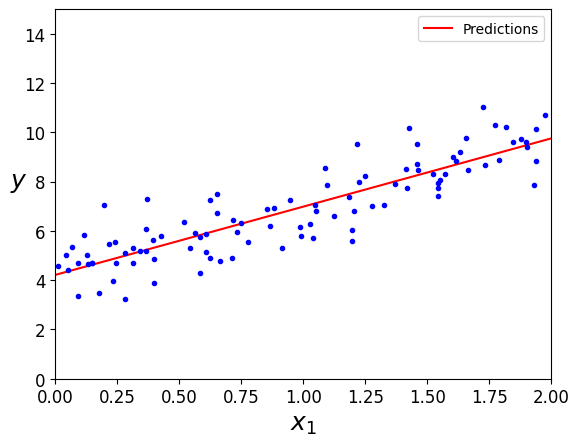

In [7]:
plt.plot(X_new, y_predict, "r-", label='Predictions');
plt.legend(loc='best');
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.plot(X, y, "b.");
plt.axis([0, 2, 0, 15]);
plt.show();

In [8]:
X_new.shape

(2, 1)

In [9]:
X_new.reshape(1, -1).shape

(1, 2)

In [15]:
# The equivalent code using Scikit-Learn:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))
print("intercept: ", lin_reg.intercept_[0], "slope: ", lin_reg.coef_[0,0])
lin_reg.predict(X_new.reshape(-1, 1))


LinearRegression()

intercept:  4.215096157546747 slope:  2.7701133864384837


array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.21509616],
       [2.77011339]])

In [20]:
import statsmodels.api as sm

model = sm.OLS(y.reshape(-1, 1), X.reshape(-1, 1), hasconst=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              747.4
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                    6.30e-48
Time:                        17:41:17   Log-Likelihood:                         -230.21
No. Observations:                 100   AIC:                                      462.4
Df Residuals:                      99   BIC:                                      465.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.9803      0.219     27.338      0.000       5.546       6.414
==============================================================================
Omnibus:                        9.092   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.538
Skew:                           0.111   Prob(JB):                        0.171
Kurtosis:                       2.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sm.OLS.from_formula('y ~ x1 + x2....')

TypeError: Model.from_formula() missing 1 required positional argument: 'data'

## Gradient Descent

- **Gradient Descent** is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems.
- The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of
the ground below your feet. A good strategy to get to the bottom of the valley quickly
is to go downhill in the direction of the steepest slope. This is exactly what Gradient
Descent does: it measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient. Once the gradient
is zero, you have reached a minimum!

1) fill θ with random values (this is called random initialization)

2) improve θ gradually, taking one baby step at a time,

3) each step attempts to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum

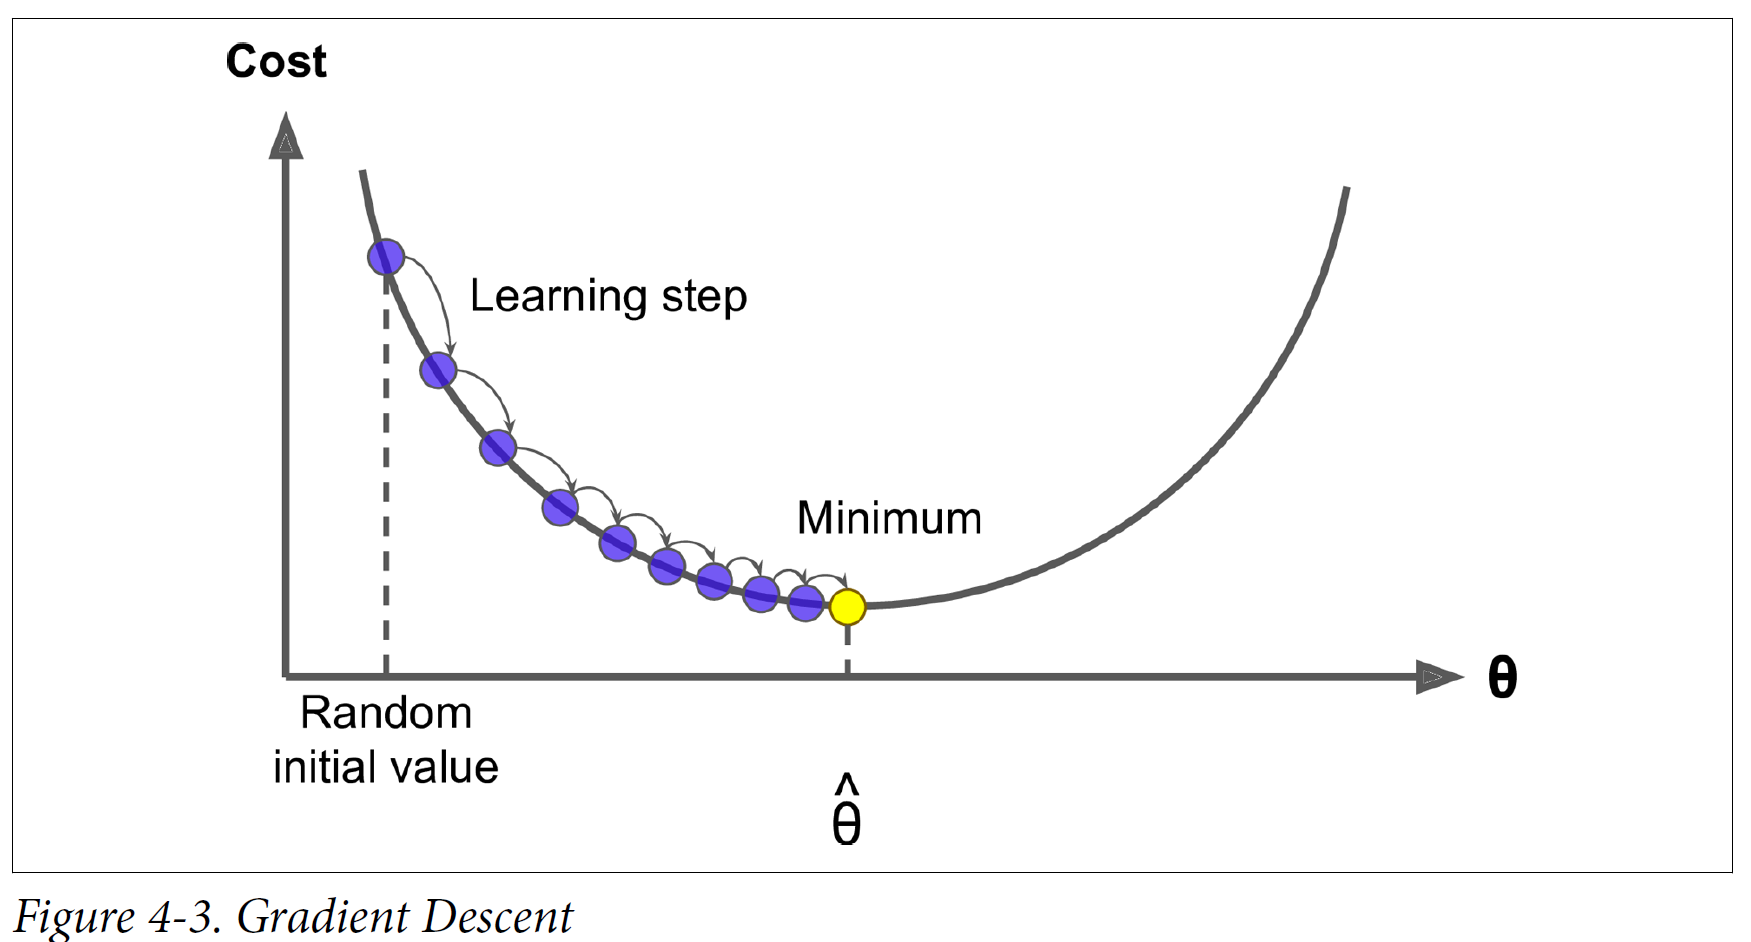

- An important parameter in Gradient Descent is the size of the steps, determined by
the **learning rate** hyperparameter.
- If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time

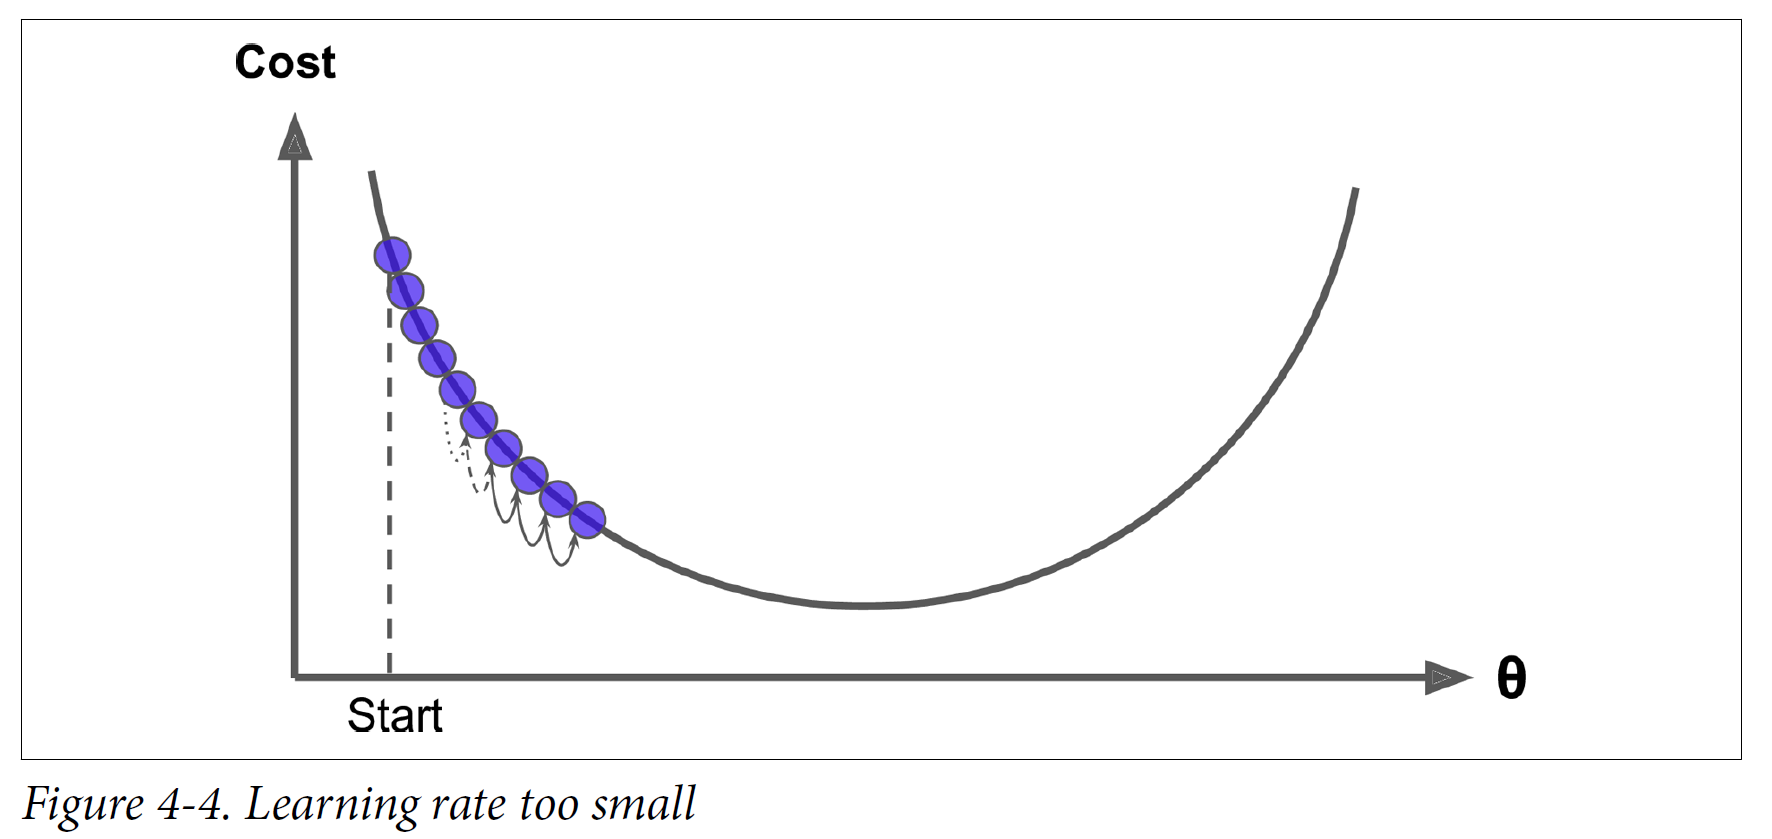

- On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before.
- This might make the algorithm diverge, with larger and larger values, failing to find a good
solution

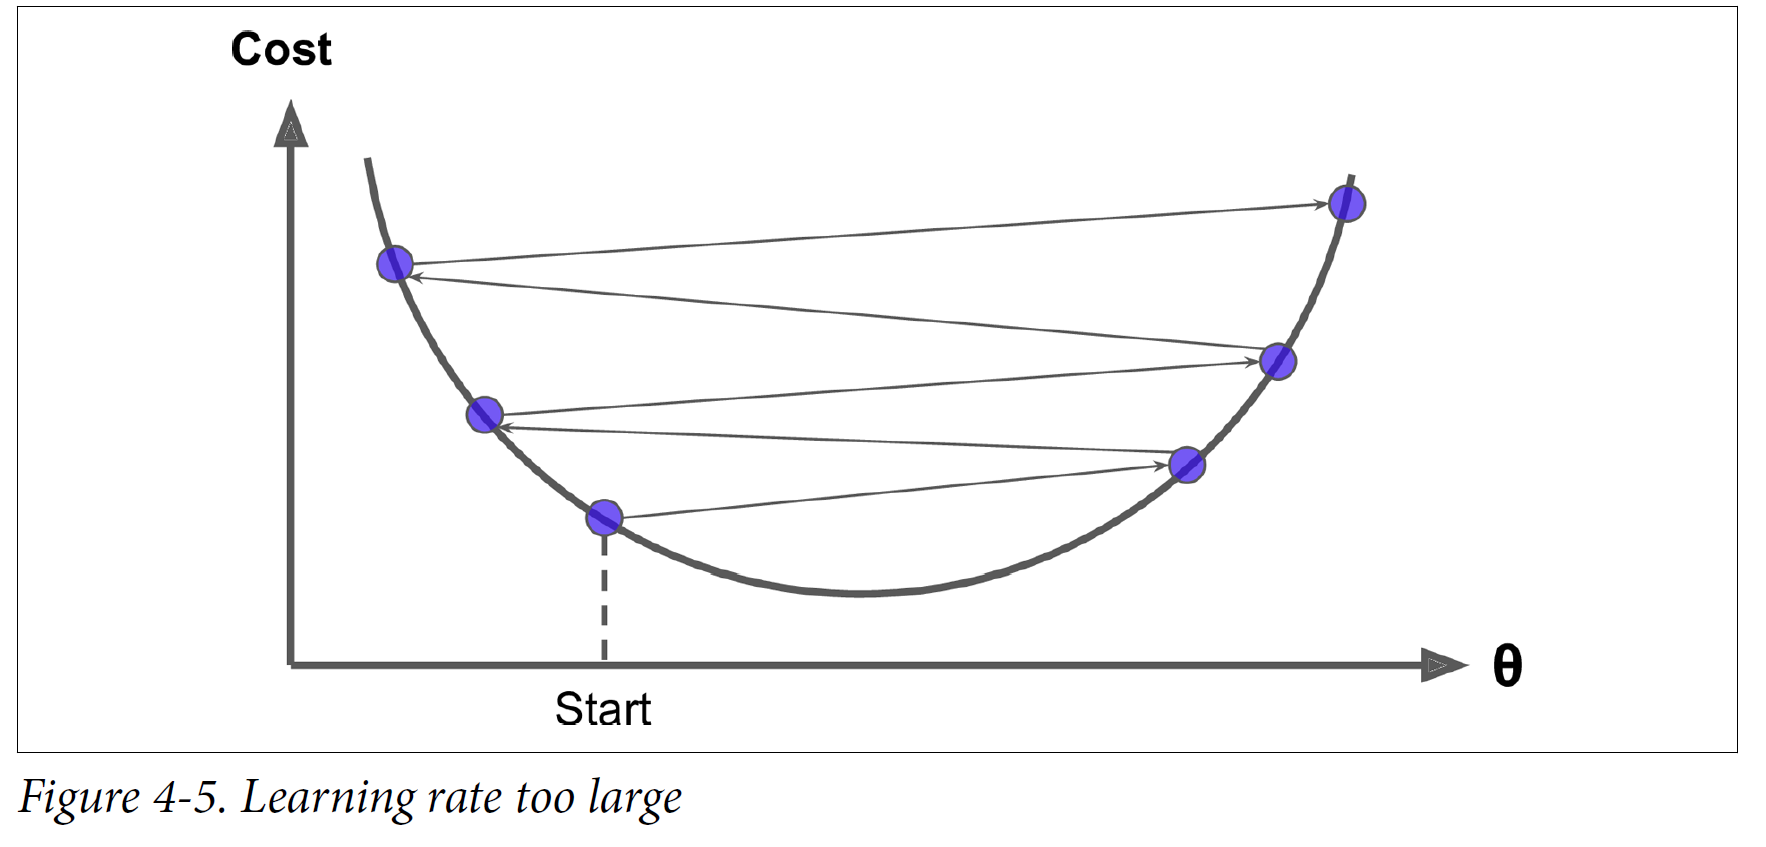

- Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum very
difficult.

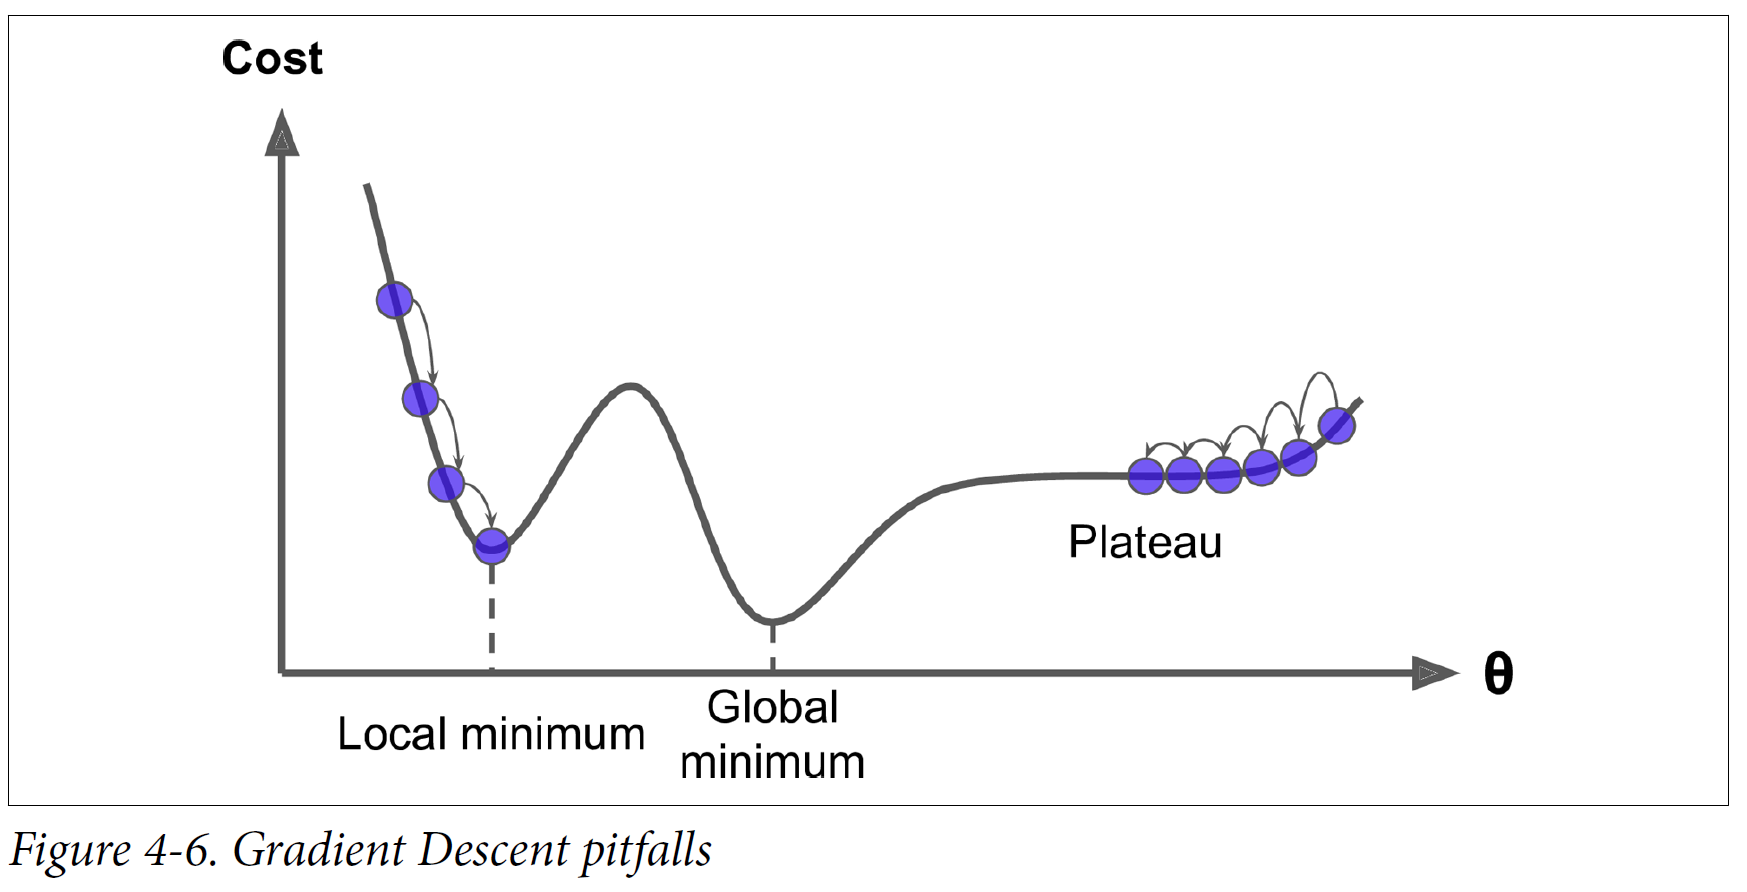

- Fortunately, the MSE cost function for a Linear Regression model happens to be a **convex function**, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.

- This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.

- These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum

- In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if
the features have very different scales

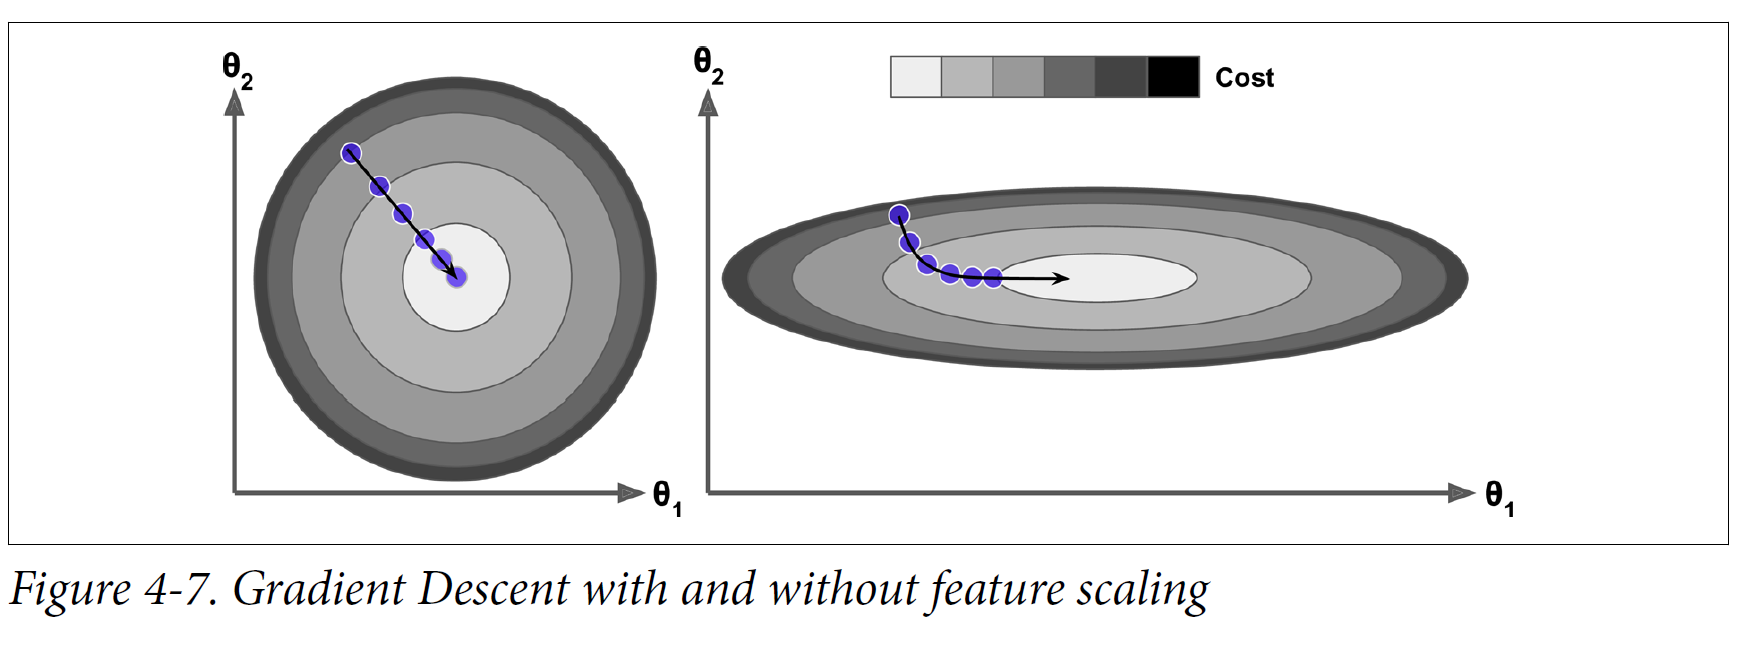

- training a model means searching for a combination of model parameters that minimizes a cost function (over the training set).

- It is a search in the model’s **parameter space**: the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a needle
in a 300-dimensional haystack is much trickier than in three dimensions.
- Fortunately,
since the cost function is convex in the case of Linear Regression, the needle is
simply at the bottom of the bowl

### Linear regression using batch gradient descent

To implement Gradient Descent, you need to compute the gradient of the cost function
with regards to each model parameter $θ_j$.

-In other words, you need to calculate how much the cost function will change if you change $θ_j$ just a little bit. This is called a **partial derivative**.

$\frac{\partial \mathrm{MSE}(\theta)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m \left(\theta^T\cdot \mathbf{x}^{(i)} - y^{(i)} \right)x_j^{(i)}$

The gradient vector, noted $∇_θ\mathrm{MSE}(θ)$, contains all the partial derivatives of the cost function (one for each model parameter):

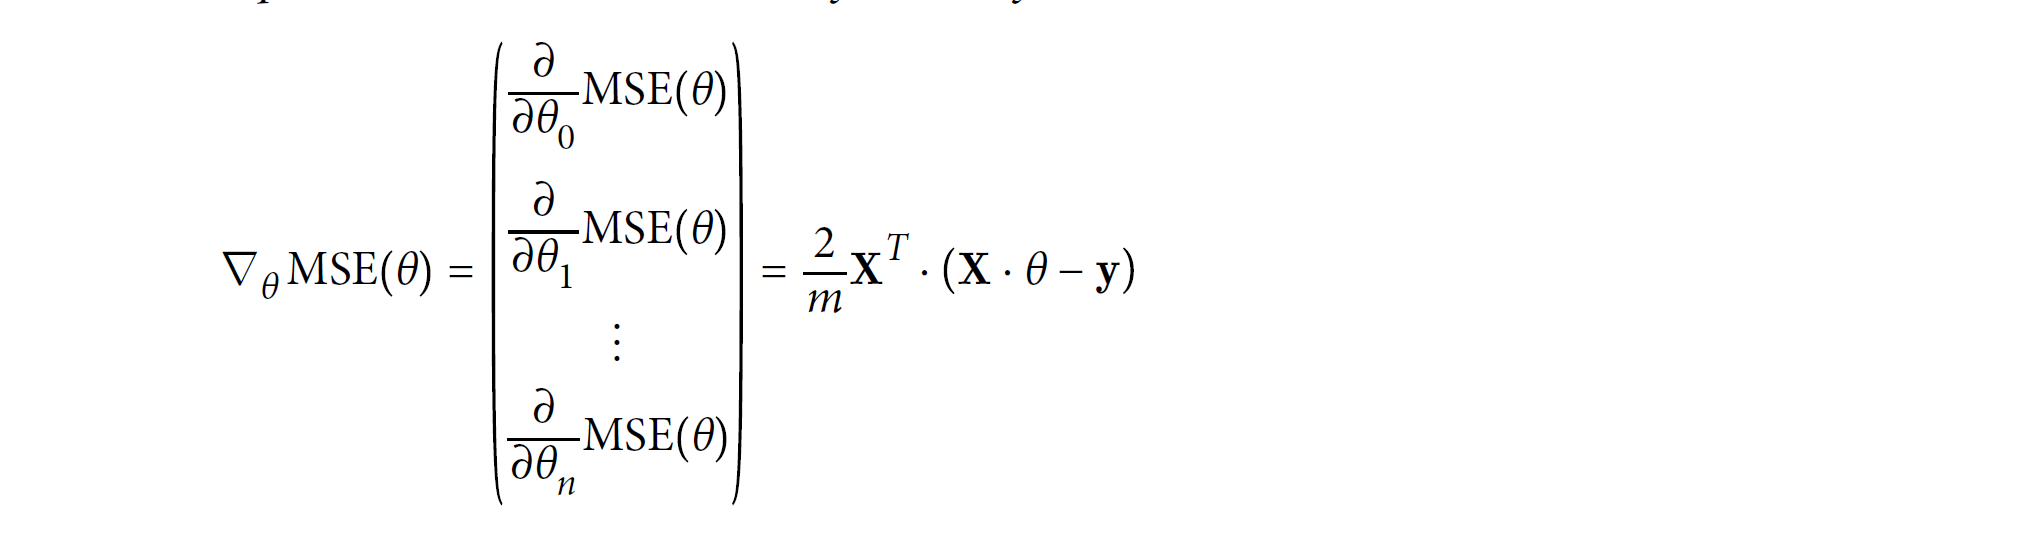

Notice that this formula *involves calculations over the full training
set X, at each Gradient Descent step*!

This is why the algorithm is called **Batch Gradient Descent**: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets 

However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation.

- Once you have the gradient vector, which points uphill, 
*just go in the opposite direction to go downhill*.

- This means subtracting $∇_θ\mathrm{MSE}(θ)$ from $θ$. This is where the
learning rate $η$ comes into play: multiply the gradient vector by η to determine the
size of the downhill step

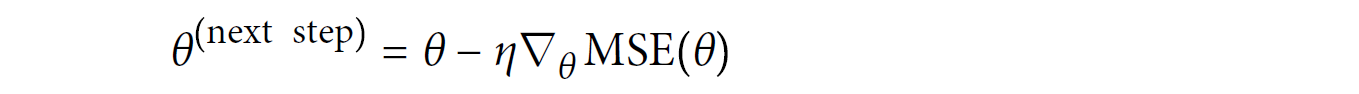

In [55]:
# Hyperparameters
eta = 0.1
n_iterations = 2000
m = 100

# Initialization 
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    
    # Calculate the gradient
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    # Get the new theta
    theta = theta - eta * gradients
    
    # Check if tolerances have been exceeded
    # if yes STOP 

In [56]:
theta

array([[4.21509616],
       [2.77011339]])

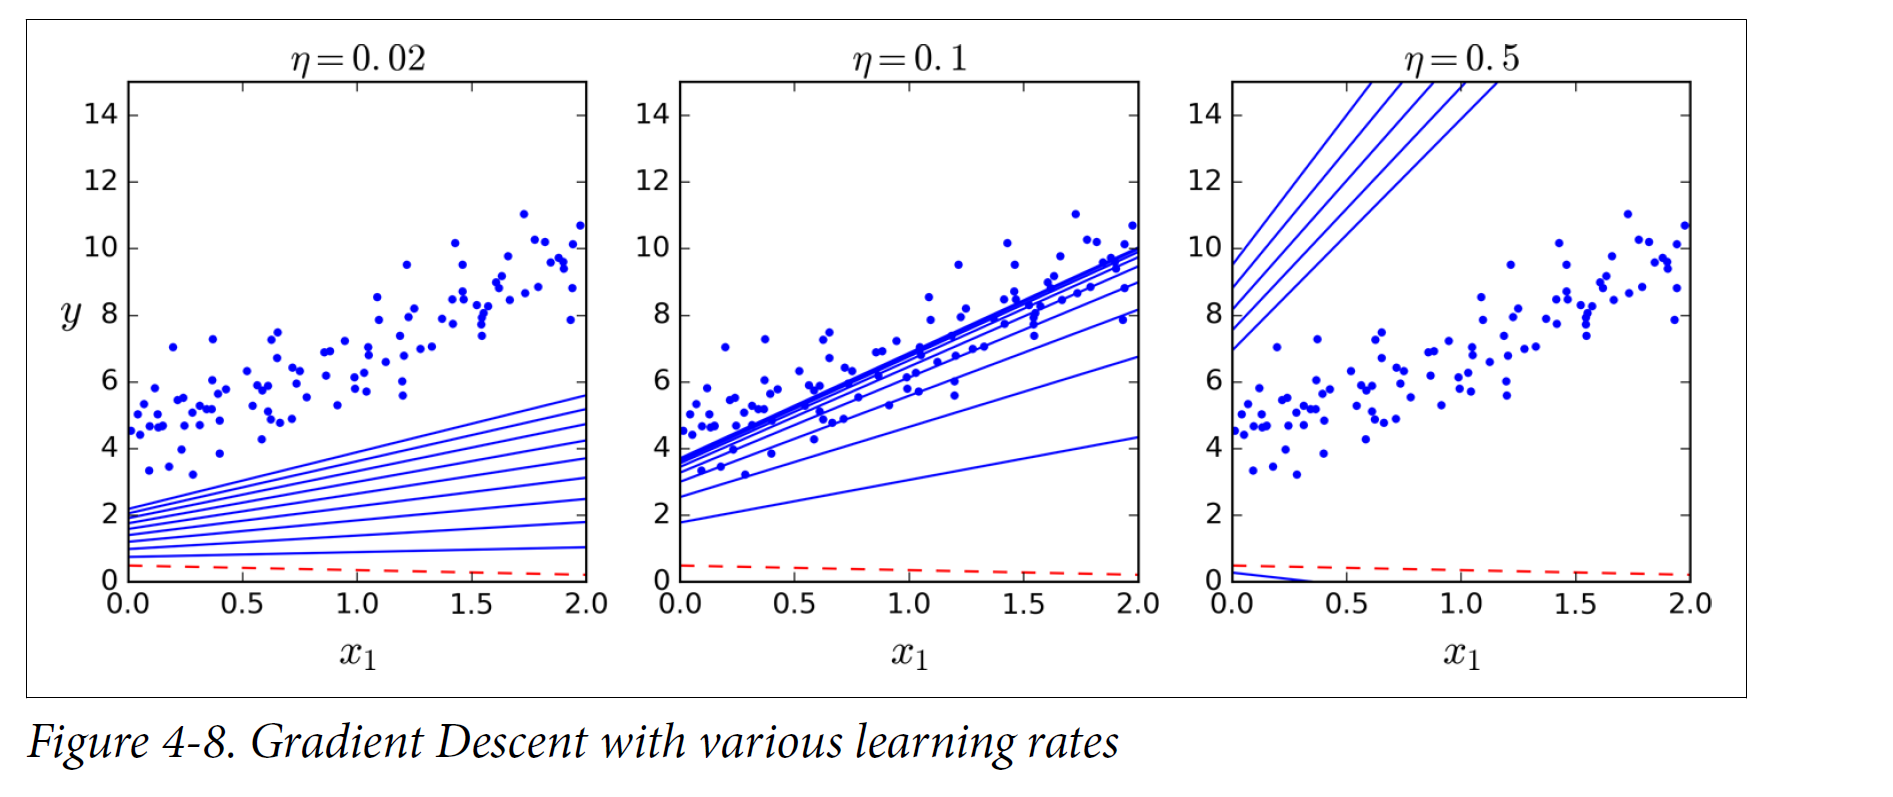

- To find a good learning rate, you can use **grid search**.
- However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge
- You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore.

- A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number $ϵ$ (called the *tolerance*)—because this happens when Gradient Descent has (almost) reached the minimum

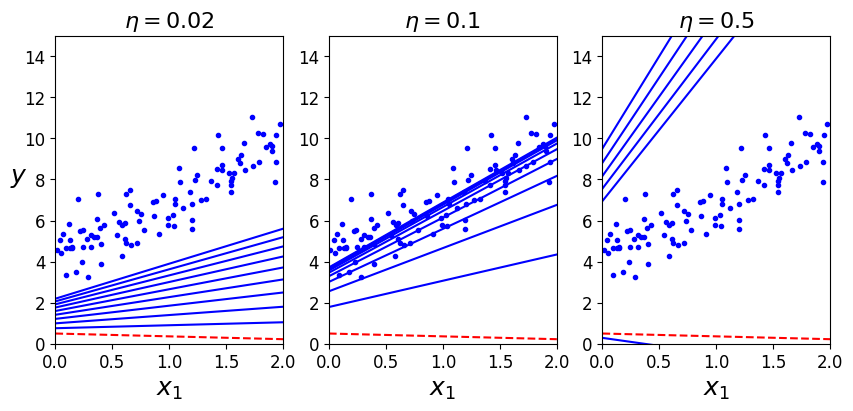

In [57]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.");    # scatter
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)    # current estimate
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style);
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18);
    plt.axis([0, 2, 0, 15]);
    plt.title(r"$\eta = {}$".format(eta), fontsize=16);
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4));
plt.subplot(131); plot_gradient_descent(theta, eta=0.02);
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd);
plt.subplot(133); plot_gradient_descent(theta, eta=0.5);

plt.show();

In [58]:
theta_path_bgd[-1]

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

- The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

- At the opposite extreme, **Stochastic Gradient Descent** just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

- Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration

- On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average.

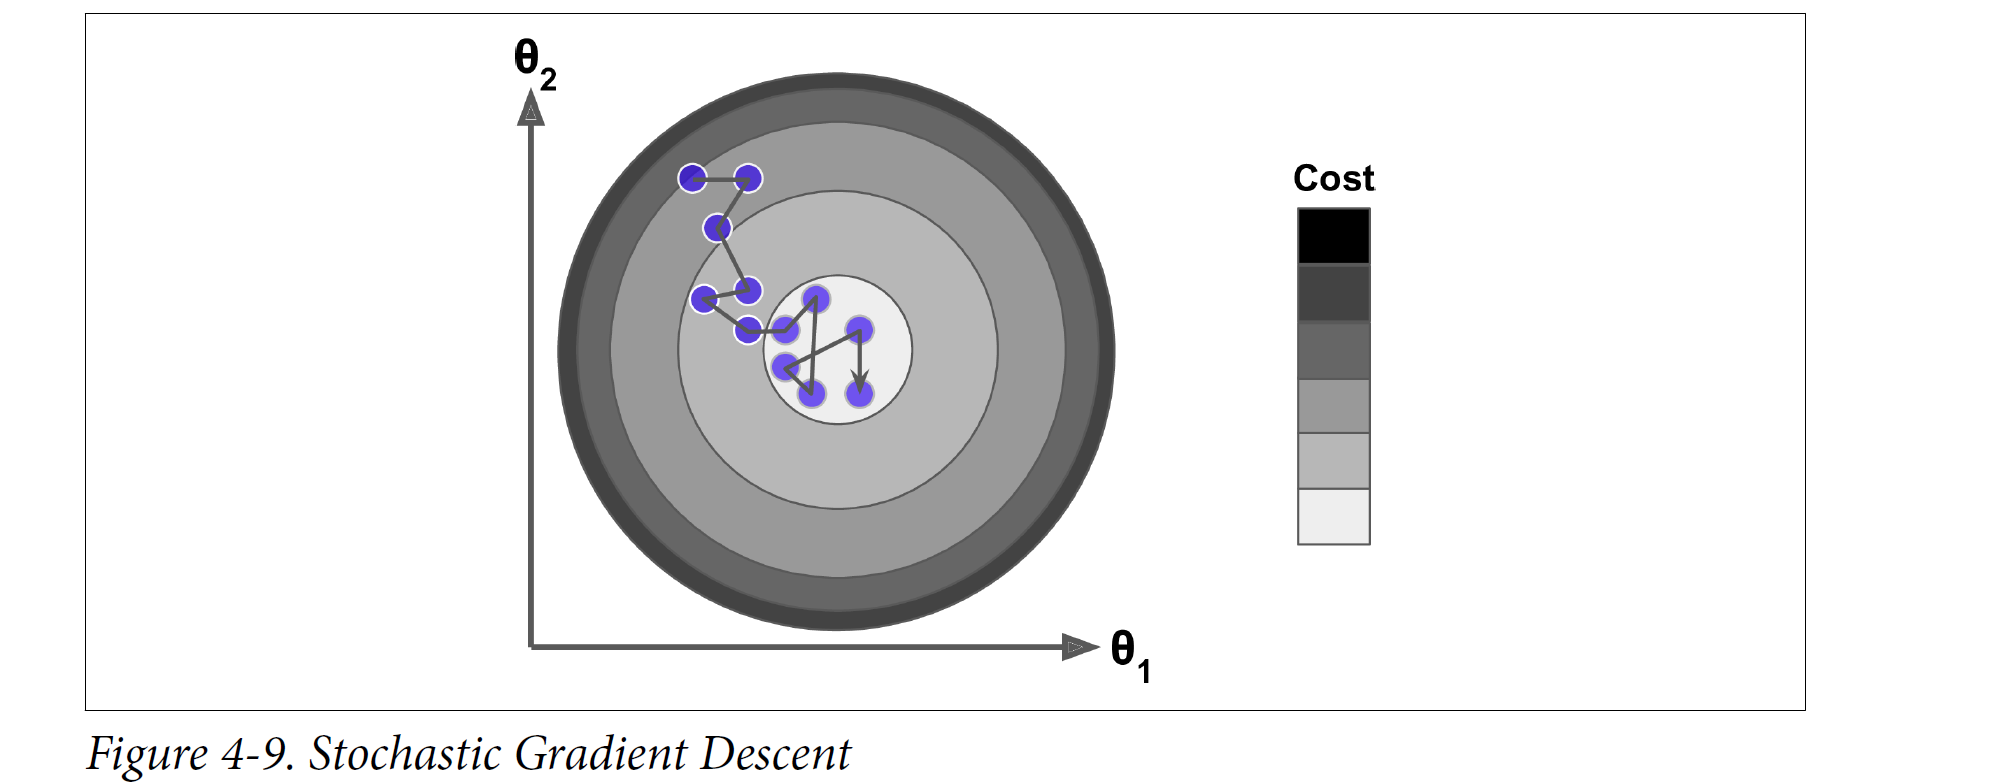

- When the cost function is very irregular, this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.

- Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum.

- One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum.

- This process is called **simulated annealing**,
because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down. The function that determines the learning rate at each iteration
is called the **learning schedule**

In [59]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

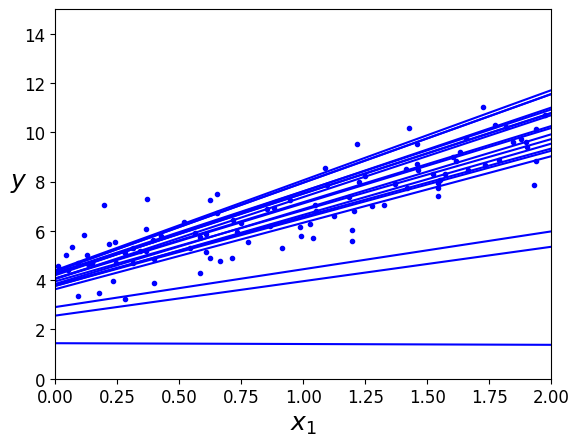

In [66]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t, t_power=1):
    """Hyperbolic schedule"""
    return t0 / (t + t1) ** t_power   # start with eta(0)=0.1, eta(50)=0.05, eta(100)=0.0333 

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    # An epoch is an iteration over the whole training dataset
    eta = learning_schedule(epoch * m)       # calculate epoch's learning rate
    for i in range(m):
        if epoch == 0 and i < 20:              # plot the firt few iterations 
            y_predict = X_new_b.dot(theta)            
            style = "b-" if i > 0 else "r--"          
            plt.plot(X_new, y_predict, style);         
        random_index = np.random.randint(m)   # pick an index to calculate gradient
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.");                                 # scatter
plt.xlabel("$x_1$", fontsize=18);                   
plt.ylabel("$y$", rotation=0, fontsize=18);            
plt.axis([0, 2, 0, 15]);                               
plt.show();                                           

- By convention we iterate by rounds of m iterations; each round is called an **epoch**.
- While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a fairly good
solution

In [67]:
theta

array([[4.20791   ],
       [2.73366774]])

- To perform Linear Regression using SGD with Scikit-Learn, you can use the `SGDRegressor` class, which defaults to optimizing the squared error cost function.

- The following code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None)

In [69]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,
                       tol=0.001,
                       penalty=None,
                       eta0=0.1,
                       random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

(array([4.24365286]), array([2.8250878]))

### Mini-batch Gradient Descent

- Mini-batch Gradient Descent is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches.
- The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)    # very important step!
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    eta = learning_schedule(epoch * m)
    for i in range(0, m, minibatch_size):       # split the m elements into minibatches
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)      # gradient for minibatch!
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.21187531],
       [2.76928973]])

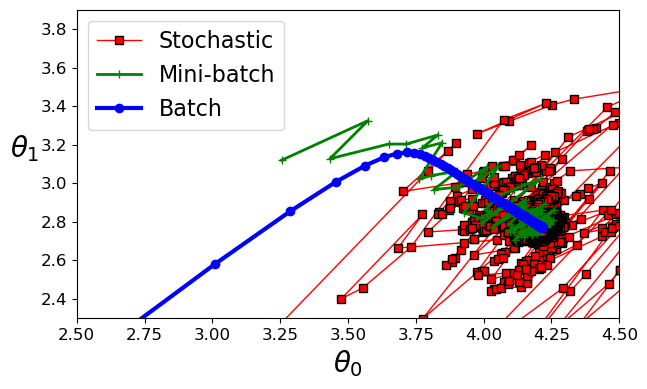

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4));
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s",
         markeredgecolor='black', linewidth=1, label="Stochastic");
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch");
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch");
plt.legend(loc="upper left", fontsize=16);
plt.xlabel(r"$\theta_0$", fontsize=20);
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0);
plt.axis([2.5, 4.5, 2.3, 3.9]);
plt.show();

| Algorithm        | Large m | Out-of-core support | Large n | Hyperparemeters | Scaling required | Scikit-Learn     |
|------------------|---------|---------------------|---------|----------------|------------------|------------------|
|  Normal Equation | Fast    | No                  | Slow    | 0              | No               | LinearRegression |
| Batch GD         | Slow    | No                  | Fast    | 2              | Yes              | n/a              |
| Stochastic GD    | Fast    | Yes                 | Fast    | $>=$2            | Yes              | SGDRegressor     |
| Mini-batch GD    | Fast    | Yes                 | Fast    | $>=$2            | Yes              | n/a              |

## Polynomial Regression

What if your data is actually more complex than a simple straight line?

Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**.

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation

In [25]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

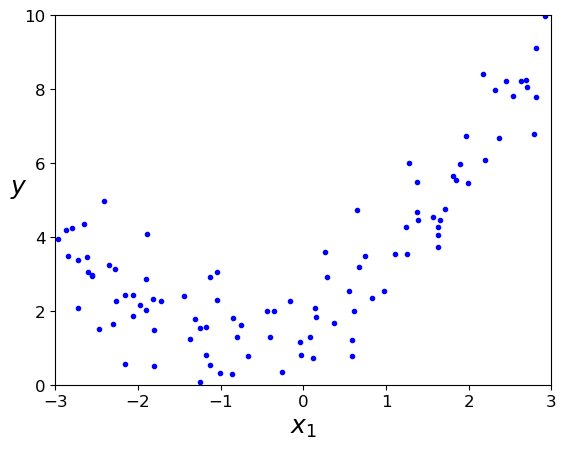

In [26]:
plt.plot(X, y, "b.");
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.axis([-3, 3, 0, 10]);
plt.show();

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.75275929])

array([-0.75275929,  0.56664654])

In [28]:
(-0.75275929) ** 2

0.566646548681304

In [29]:
X_poly.reshape(-1, 2).shape

(100, 2)

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly.reshape(-1, 2), y.reshape(-1, 1))
lin_reg.intercept_[0], lin_reg.coef_[0]

LinearRegression()

(1.7813458120291457, array([0.93366893, 0.56456263]))

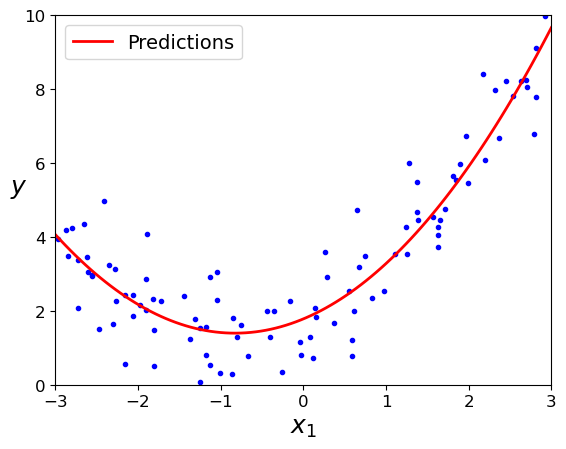

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly.reshape(-1, 2))
plt.plot(X, y, "b.");
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions");
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.legend(loc="upper left", fontsize=14);
plt.axis([-3, 3, 0, 10]);
plt.show();

- Note that when there are multiple features, Polynomial Regression is capable of finding
relationships between features (which is something a plain Linear Regression
model cannot do).
- This is made possible by the fact that `PolynomialFeatures` also
adds all combinations of features up to the given degree.
- For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the
features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

### Learning Curves

- If you perform high-degree Polynomial Regression, you will likely fit the training
data much better than with plain Linear Regression.
- For example, a 300-degree polynomial model fitted to the preceding training data:

0.9301963848496299
0.8525067519009746
0.4260082378913981


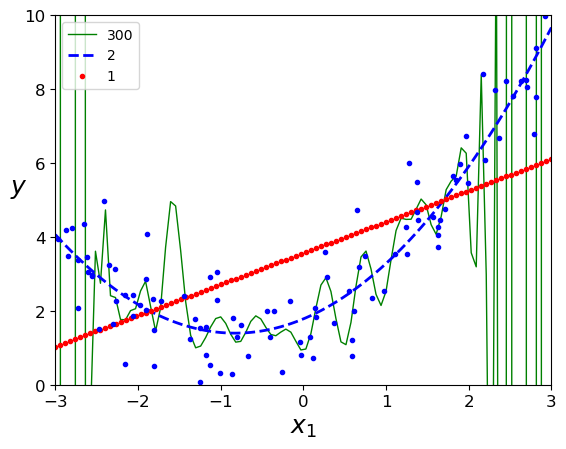

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r.", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X.reshape(-1, 1), y.reshape(-1, 1))
    print(polynomial_regression.score(X.reshape(-1, 1), y.reshape(-1, 1)))
    y_newbig = polynomial_regression.predict(X_new.reshape(-1, 1))
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width);
    plt.show;

plt.plot(X, y, "b.", linewidth=3);
plt.legend(loc="upper left");
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.axis([-3, 3, 0, 10]);
plt.show();

### Learning Curves

- The high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it.
- The model that will generalize best in this case is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

Previously, we used **cross-validation** to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it performs
poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

Another way is to look at the **learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size.

- To generate the plots, simply train the model several times on different sized subsets
of the training set.

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])    # train models of different sizes
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)     # see how it performs
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train");
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val");
    plt.legend(loc="upper right", fontsize=14);   
    plt.xlabel("Training set size", fontsize=14);
    plt.ylabel("RMSE", fontsize=14);
    

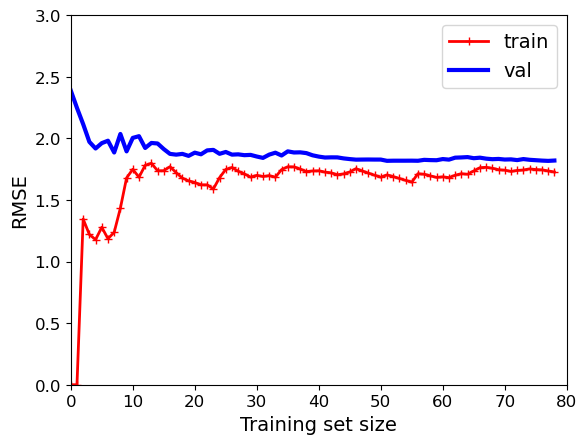

In [34]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X.reshape(-1, 1), y.reshape(-1, 1))
plt.axis([0, 80, 0, 3]);                        
plt.show();                               

Performance on the training data: 
- when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero.
- As new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instance to the training set doesn’t make the average error much better or worse.

Performance of the model on the validation data:

- When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
- Then as the model is shown more training examples, it learns and thus the validation error slowly goes down.
- However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high. 

- If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

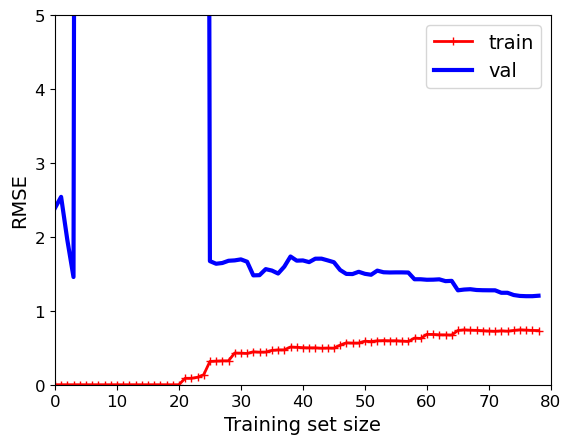

In [35]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("std_scaler", std_scaler),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X.reshape(-1, 1), y.reshape(-1, 1))
plt.axis([0, 80, 0, 5]);
plt.show();     

These learning curves look a bit like the previous ones, but there are two very important
differences:

- The error on the training data is much lower than with the Linear Regression model.
- There is a gap between the curves. This means that the model performs significantly
better on the training data than on the validation data, which is the hallmark
of an overfitting model.
However, if you used a much larger training set, the two curves would continue to get closer

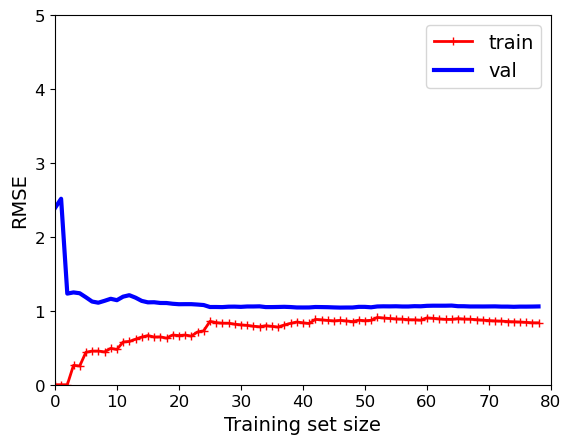

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", std_scaler),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X.reshape(-1, 1), y.reshape(-1, 1))
plt.axis([0, 80, 0, 5]);
plt.show();     

- We know this model perfectly fits the data
- Note how the train and validation errors quickly converge toward each other

### The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:

#### Bias

This part of the generalization error is due to wrong assumptions, such as assuming
that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.

#### Variance

This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree polynomial
model) is likely to have high variance, and thus to overfit the training
data.

#### Irreducible error

This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

- Increasing a model’s complexity will typically increase its variance and reduce its bias.
- Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

## Regularized/Penalized Linear Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

- For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
- For a linear model, regularization is typically achieved by constraining the weights of the model

### Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term equal to $α Σ_{i = 1}^n θ_i^2$ is added to the cost function.

- This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.
- Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.
- The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean

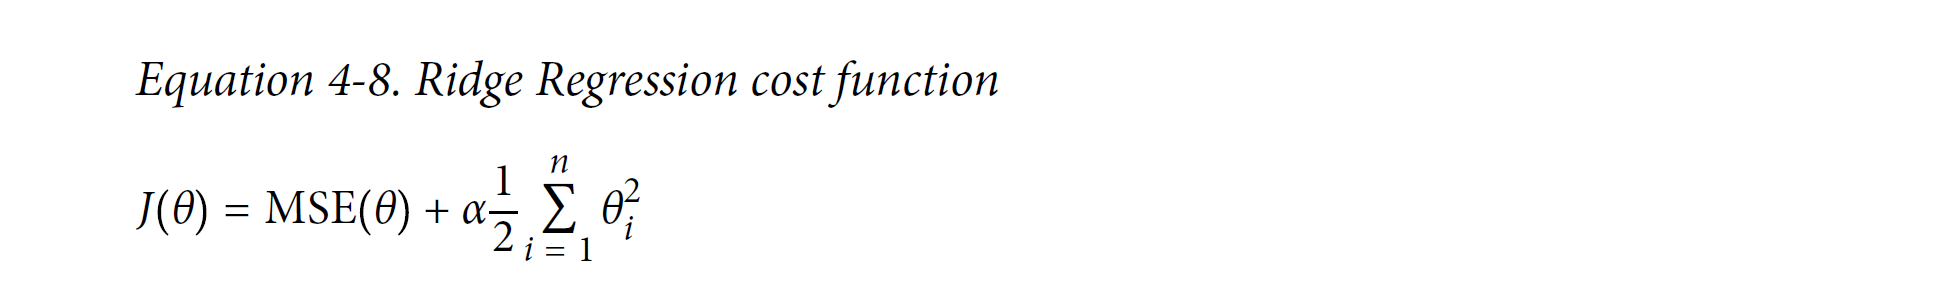

Note that the bias term $θ_0$ is not regularized (the sum starts at i = 1, not 0).

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

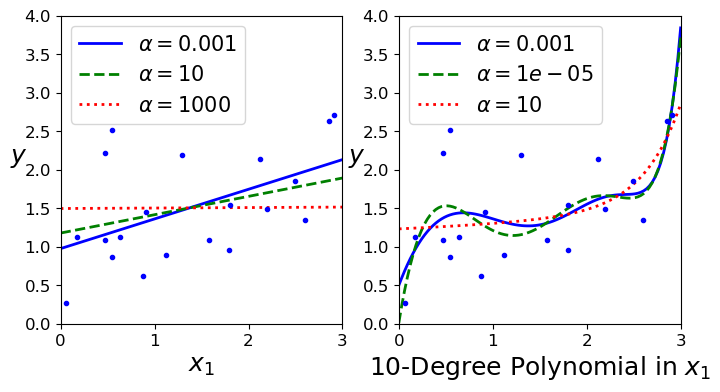

In [37]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
        y_new_regul = model.predict(X_new.reshape(-1, 1))
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw,
                 label=r"$\alpha = {}$".format(alpha));
        if polynomial:
            plt.xlabel("10-Degree Polynomial in $x_1$", fontsize=18);
        else:
            plt.xlabel("$x_1$", fontsize=18);
        plt.ylabel("$y$", rotation=0, fontsize=18);
    plt.plot(X, y, "b.", linewidth=3);
    plt.legend(loc="upper left", fontsize=15);
    plt.axis([0, 3, 0, 4]);
    plt.show;

plt.figure(figsize=(8,4));
plt.subplot(121);
plot_model(Ridge, polynomial=False, alphas=(0.001, 10, 1000), random_state=42);
plt.subplot(122);
plot_model(Ridge, polynomial=True, alphas=(0.001, 10**-5, 10), random_state=42);
plt.show();

- On the left, plain Ridge models are used, leading to linear predictions.
- On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is
scaled using a StandardScaler, and finally the Ridge models are applied to the resulting
features: this is Polynomial Regression with Ridge regularization.

- Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias.

As with Linear Regression, we can perform Ridge Regression either by computing a
closed-form equation or by performing Gradient Descent. The pros and cons are the
same.

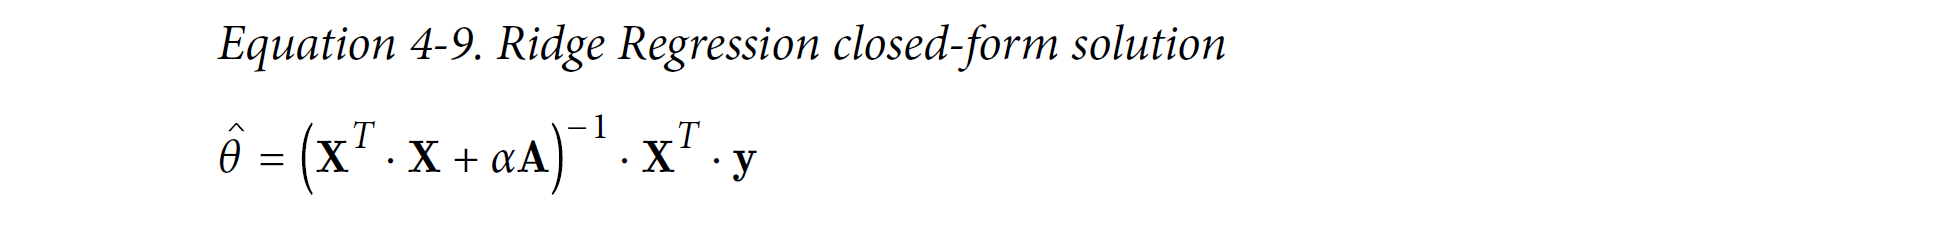

where $\mathbf{A}$ is the n × n identity matrix except with a 0 in the top-left cell, corresponding to the bias term.

In [38]:
# Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.coef_
ridge_reg.predict([[1.5]])

Ridge(alpha=1, random_state=42, solver='cholesky')

array([[0.36280369]])

array([[1.55071465]])

In [ ]:
#And using Stochastic Gradient Descent
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)   # option 1
ridge_reg.fit(X, y)
ridge_reg.coef_
ridge_reg.predict([[1.5]])

sgd_reg = SGDRegressor(max_iter=None, tol=-np.infty,
                       penalty="l2", alpha=1, l1_ratio=0,
                       eta0=0.05, epsilon=0, random_state=42)   # option 2
sgd_reg.fit(X, y.ravel())
sgd_reg.coef_
sgd_reg.predict([[1.5]])

- The penalty hyperparameter sets the type of regularization term to use.
- Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
Regression.

### Lasso Regression

*Least Absolute Shrinkage and Selection Operator* Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm.

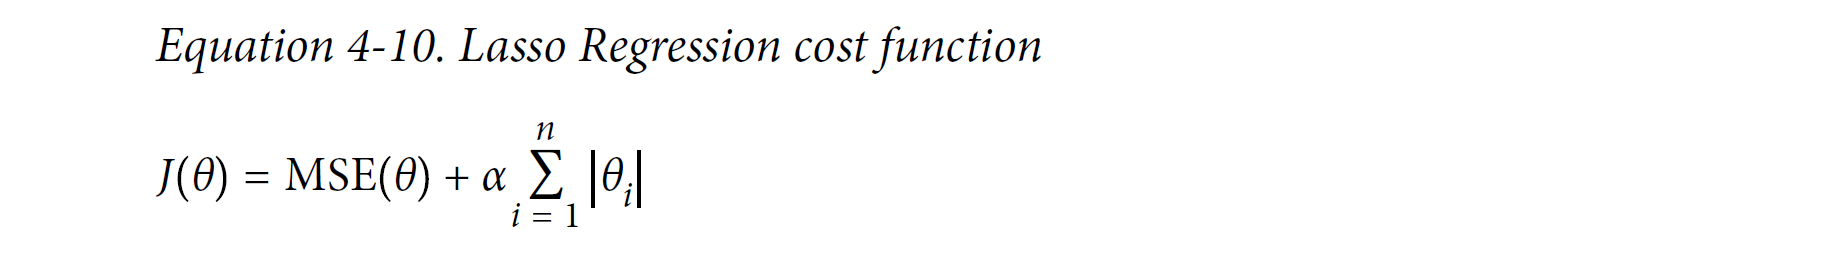

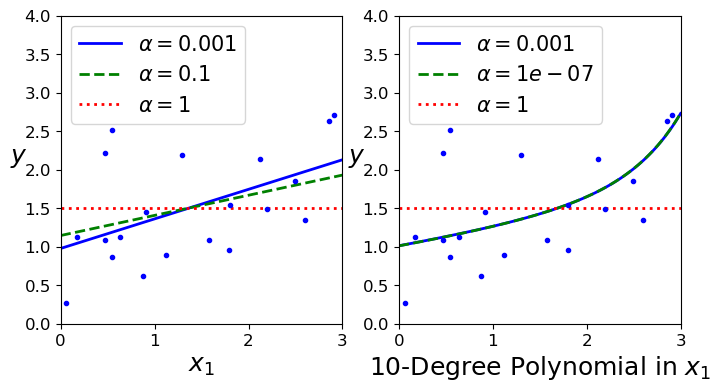

In [39]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4));
plt.subplot(121);
plot_model(Lasso, polynomial=False, alphas=(0.001, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18);
plt.subplot(122);
plot_model(Lasso, polynomial=True, alphas=(0.001, 10**-7, 1), tol=1, random_state=42)
plt.show();

- An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).

- For example, the dashed line in the right plot (with α = 10-7) looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

Here is a small Scikit-Learn example using the Lasso class. Note that you could
instead use an SGDRegressor(penalty="l1").

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.coef_
lasso_reg.predict([[1.5]])

### Elastic Net

*Elastic Net* is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression.

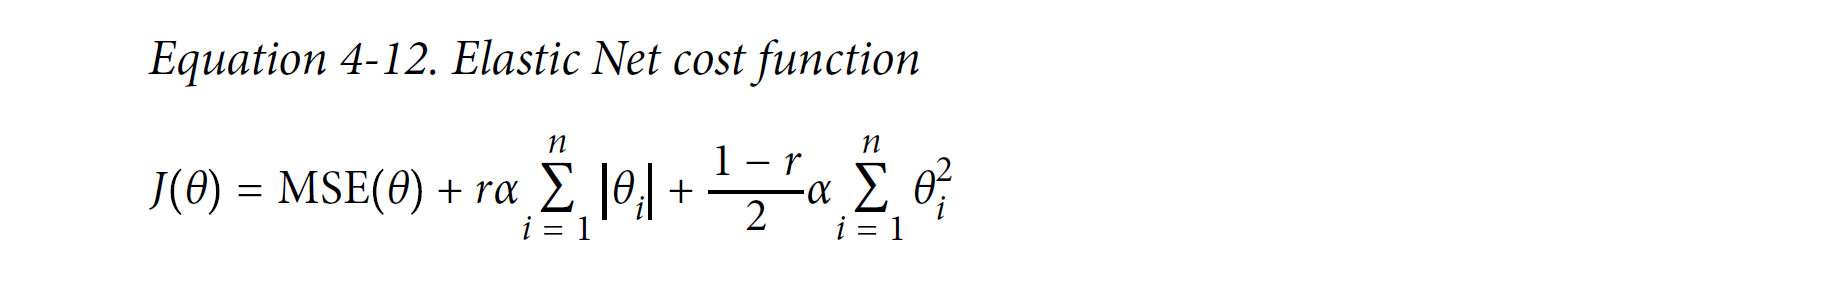


So when should you use Linear Regression, Ridge, Lasso, or Elastic Net?

- It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.


- Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed.

- In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.coef_
elastic_net.predict([[1.5]])

ElasticNet(alpha=0.1, random_state=42)

array([0.30462619])

array([1.54333232])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum.

This is called **early stopping**. 



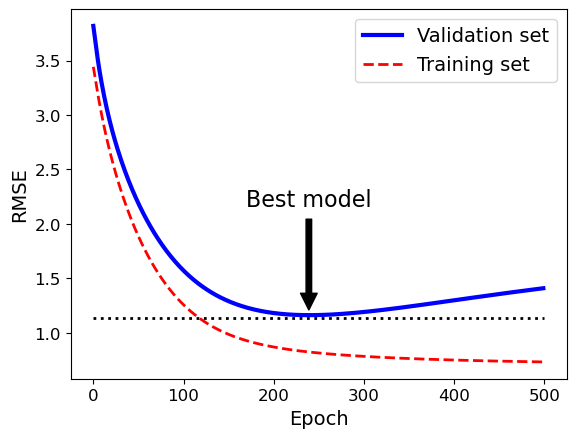

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(),
                                                  test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,     # single iteration
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,    # remember previous guess
                       learning_rate="constant",
                       random_state=42);

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            );

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2);
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set");
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set");
plt.legend(loc="upper right", fontsize=14);
plt.xlabel("Epoch", fontsize=14);
plt.ylabel("RMSE", fontsize=14);
plt.show();

- The figure shows a complex model (in this case a high-degree Polynomial Regression model) being trained using Batch Gradient Descent.

- As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set.

- However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

- Here is a basic implementation of early stopping:
- Note that with `warm_start=True`, when the `fit()` method is called, it just continues
training where it left off instead of restarting from scratch.

In [42]:
from sklearn.base import clone
# note, single iteration, warm start, constant learning rate
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42);

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train);  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled);
    val_error = mean_squared_error(y_val, y_val_predict);
    if val_error < minimum_val_error:
        minimum_val_error = val_error;
        best_epoch = epoch;
        best_model = clone(sgd_reg);
    else:
        print(epoch)
        break
    
        

best_epoch, best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

240


(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## Logistic Regression

Some regression algorithms can be used for classification as well (and vice versa). 

**Logistic Regression** (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?).

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result:

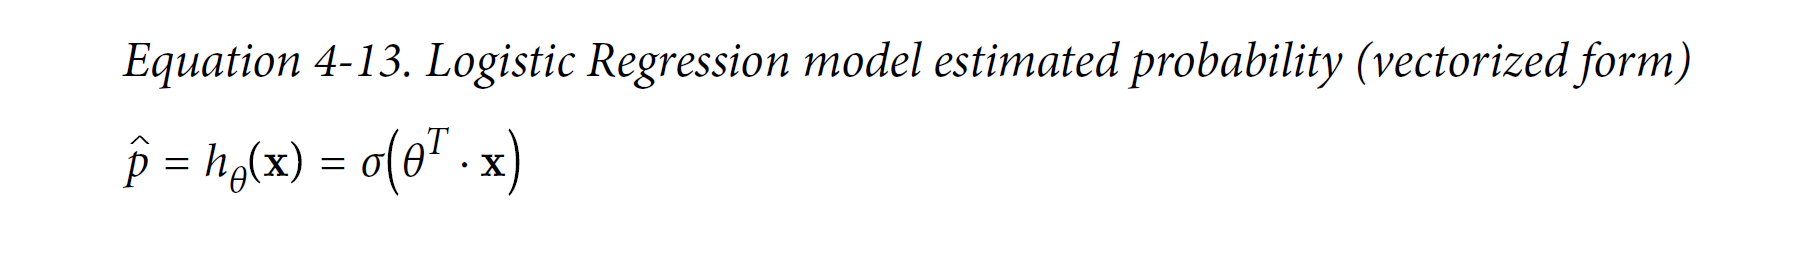

The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped)
that outputs a number between 0 and 1.

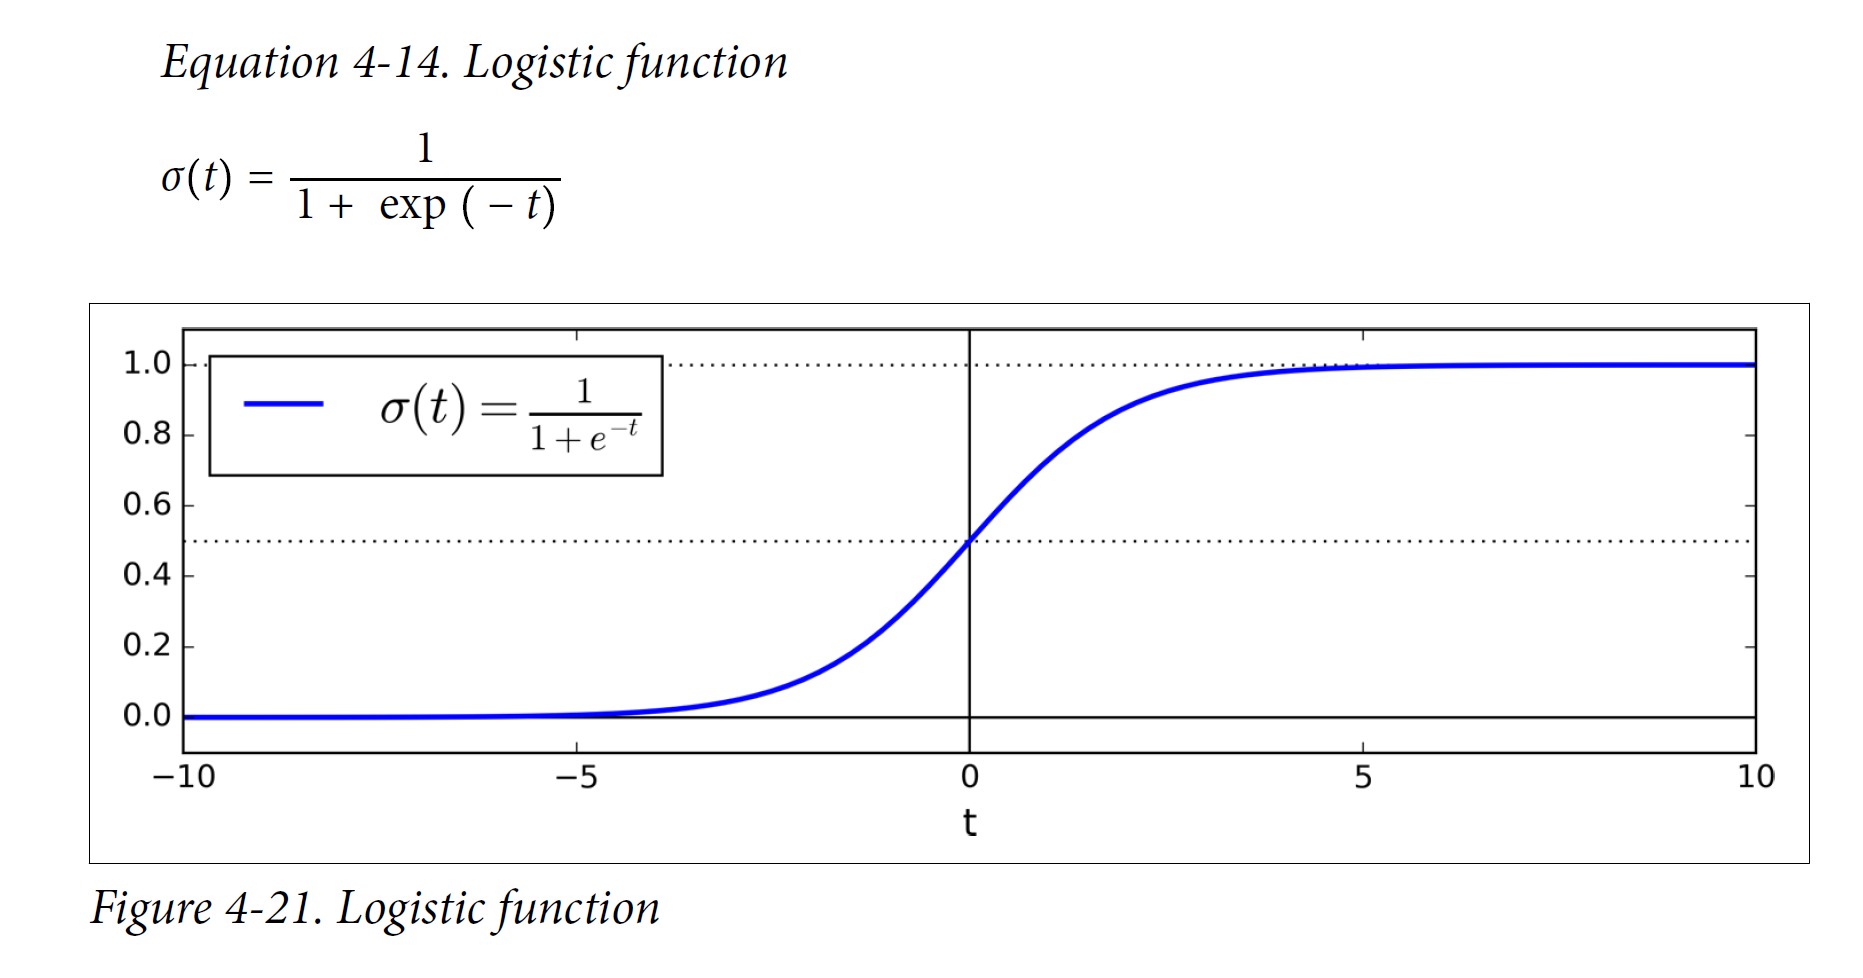

- Once the Logistic Regression model has estimated the probability $p = h_θ(x)$ that an instance x belongs to the positive class, it can make its prediction $ŷ$ easily

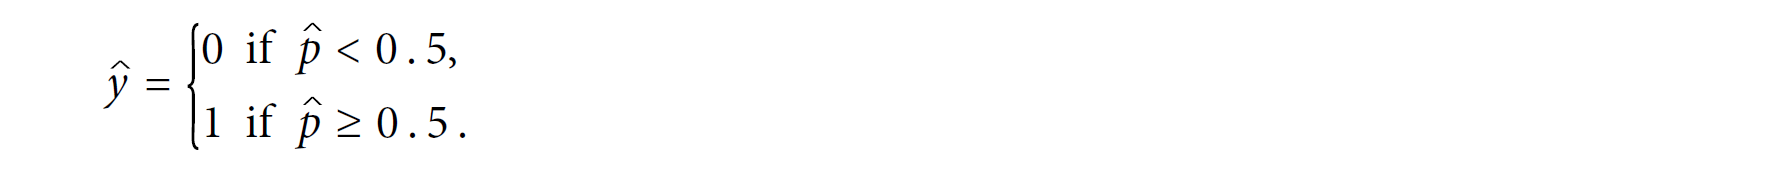

- Notice that $σ(t) < 0.5$ when $t < 0$, and $σ(t) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression model predicts $1$ if $θ^T · x$ is positive, and $0$ if it is negative.

### Training

The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). For a single instance:

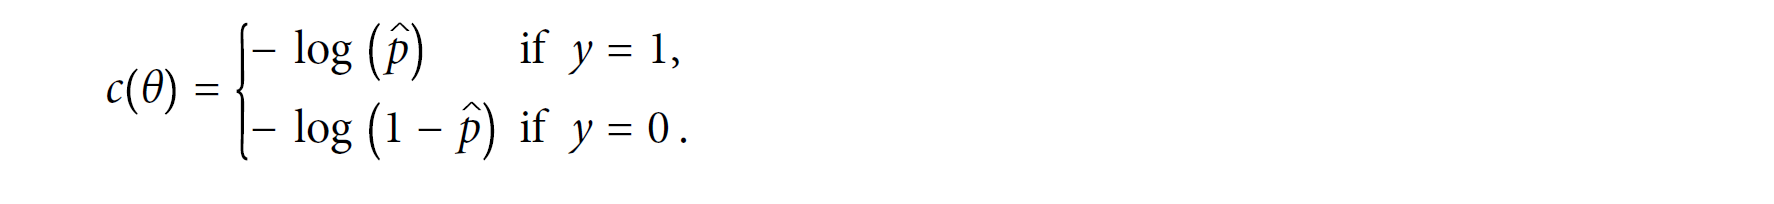

- This cost function makes sense because $– log(t)$ grows very large when $t$ approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive instance.


- The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression (as you can verify easily), called the **log loss**:

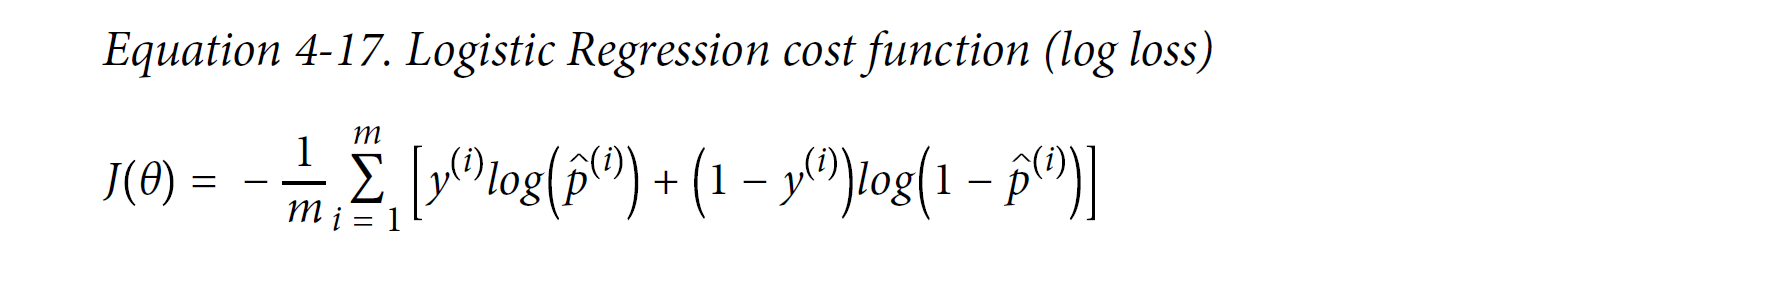

- The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation).

- But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning
rate is not too large and you wait long enough).

- The partial derivatives of the cost function with regards to the jth model parameter $θ_j$ is given by

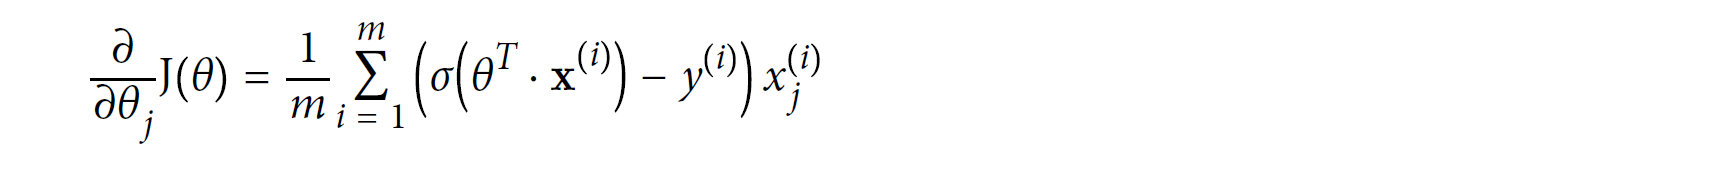

- For each instance, this equation computes the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances.

- Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm. 
- For Stochastic GD you would of course just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

Let’s use the *iris* dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

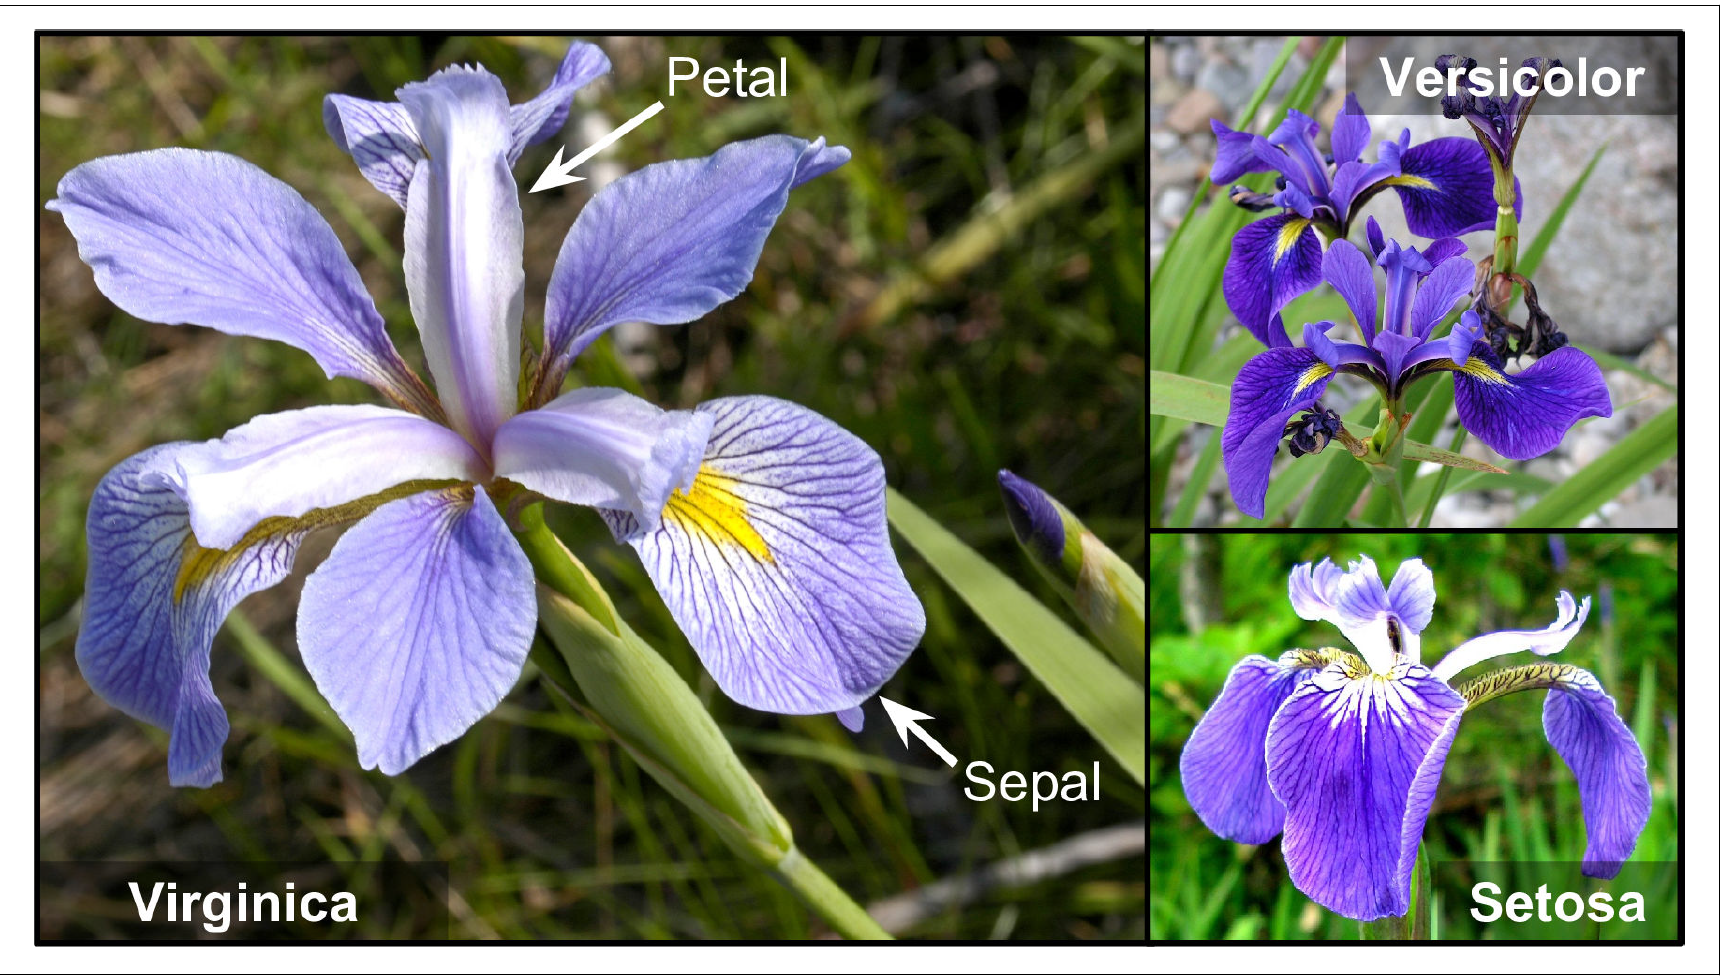

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
print(iris.DESCR)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
import numpy as np

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype('int')  # 1 if Iris-Virginica, else 0

In [45]:
y[-10:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

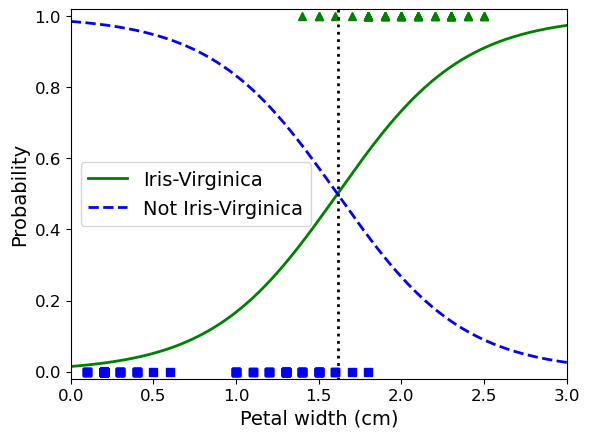

In [47]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica");
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica");
plt.plot(X[y==0], y[y==0], "bs");
plt.plot(X[y==1], y[y==1], "g^");
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2);
plt.xlabel("Petal width (cm)", fontsize=14);
plt.ylabel("Probability", fontsize=14);
plt.legend(loc="center left", fontsize=14);
plt.axis([0, 3, -0.02, 1.02]);
plt.show();

In [ ]:
decision_boundary
log_reg.predict([[1.62], [1.61]])  # on both sides of decision boundary

- The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm.
- Notice that there is a bit of overlap.

- Above about 2 cm the classifier is highly confident that the flower is an Iris-
Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class).

- The next figure shows the same dataset but this time displaying two features: petal width
and length.
- Once trained, the Logistic Regression classifier can estimate the probability
that a new flower is an Iris-Virginica based on these two features.
- The dashed line represents the points where the model estimates a 50\% probability: this is the model’s
decision boundary. 
- Note that it is a linear boundary.
- Each parallel line represents the points where the model outputs a specific probability,
from 15\% (bottom left) to 90\% (top right).
- All the flowers beyond the top-right line have an over 90\% chance of
being Iris-Virginica according to the model.

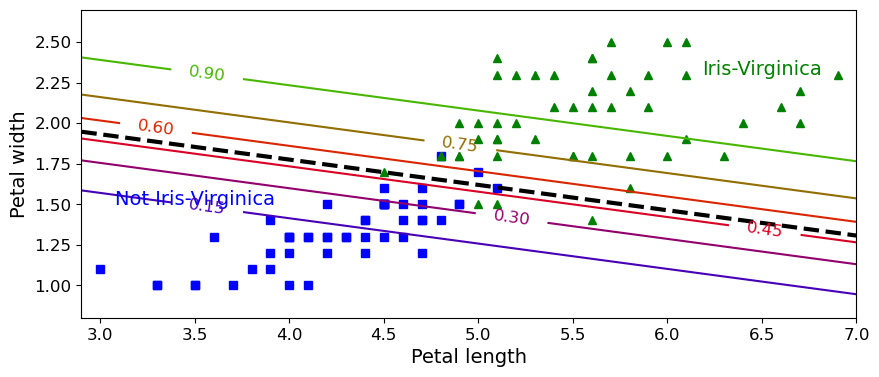

In [48]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype('int')

log_reg = LogisticRegression(solver="liblinear",
                             C=10, random_state=42)  # C=1/alpha is the regularization parameter
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4));
plt.plot(X[y==0, 0], X[y==0, 1], "bs");
plt.plot(X[y==1, 0], X[y==1, 1], "g^");

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right 
             + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12);
plt.plot(left_right, boundary, "k--", linewidth=3);
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center");
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center");
plt.xlabel("Petal length", fontsize=14);
plt.ylabel("Petal width", fontsize=14);
plt.axis([2.9, 7, 0.8, 2.7]);
plt.show();

- Just like the other linear models, Logistic Regression models can be regularized using
ℓ1 or ℓ2 penalties.
- Scitkit-Learn actually adds an ℓ2 penalty by default.
- The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers.

This is called **Softmax Regression, or Multinomial Logistic Regression**.

- When given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.
- The equation to compute $s_k(x)$ should look familiar, as it is just like the equation
for Linear Regression prediction:

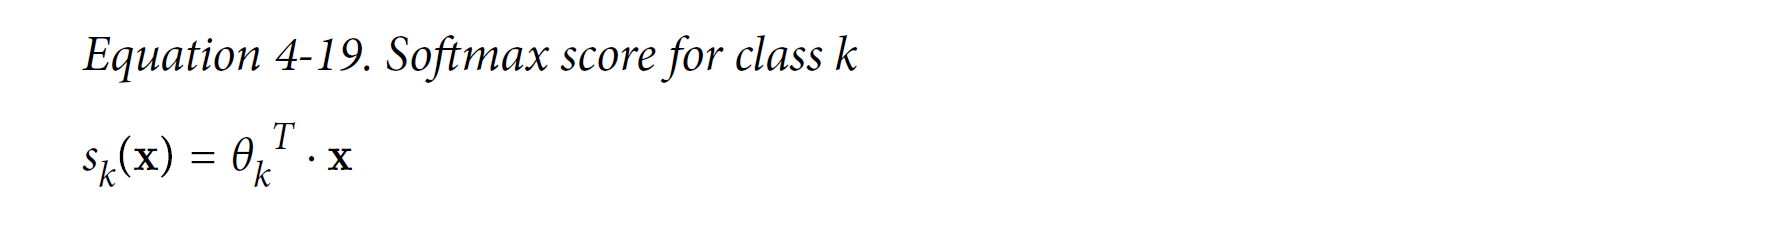

- Note that each class has its own dedicated parameter vector $θ_k$. All these vectors are
typically stored as rows in a parameter matrix Θ.

- Once you have computed the score of every class for the instance x, you can estimate the probability $p_k$ that the instance belongs to class $k$ by running the scores through the softmax function.
- The softmax function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).

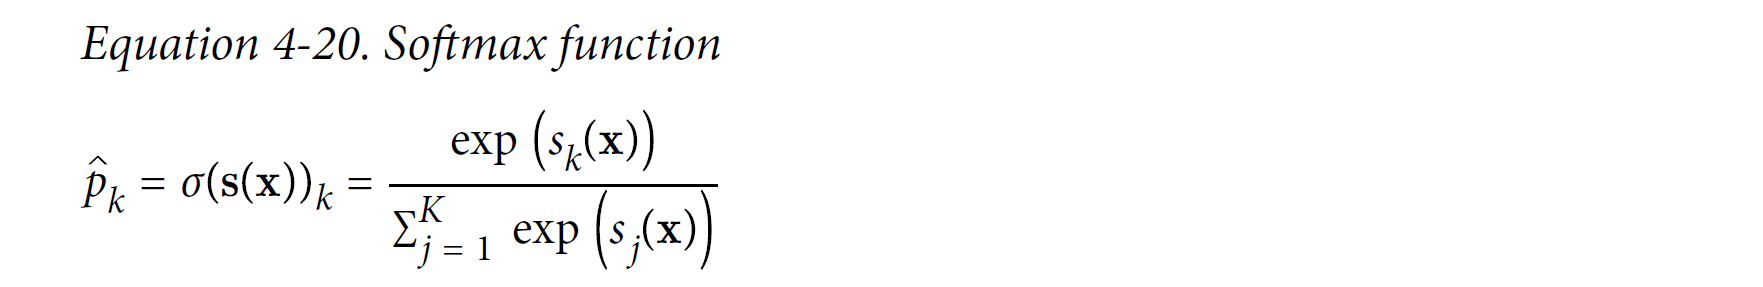



- Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
the class with the highest estimated probability (which is simply the class with the
highest score)

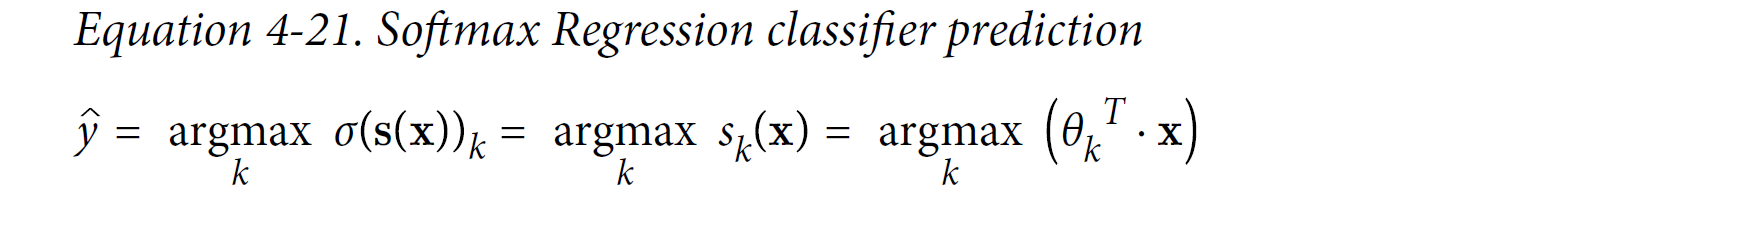

- Once again, the objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes).
- Minimizing the cost function called the **cross entropy**, should lead to this objective because it penalizes the model when it estimates a low probability for a target class.
- Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

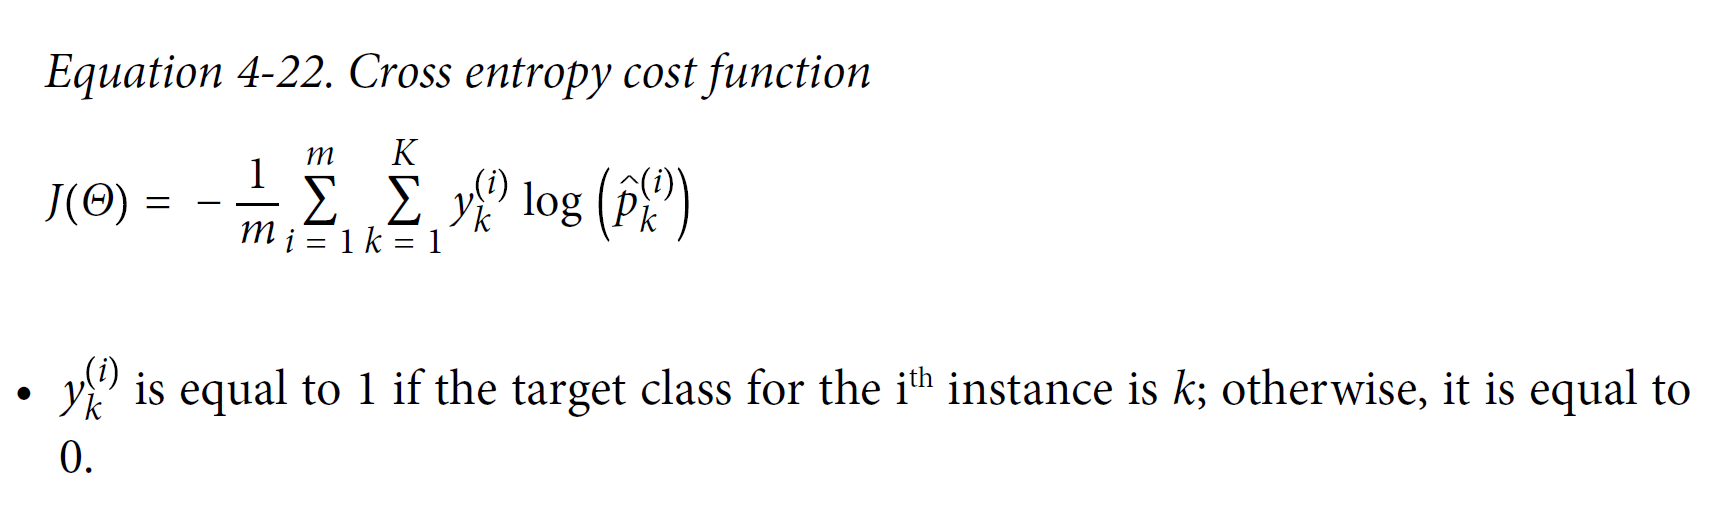

The gradient vector of this cost function with regards to $θ_k$ is given by

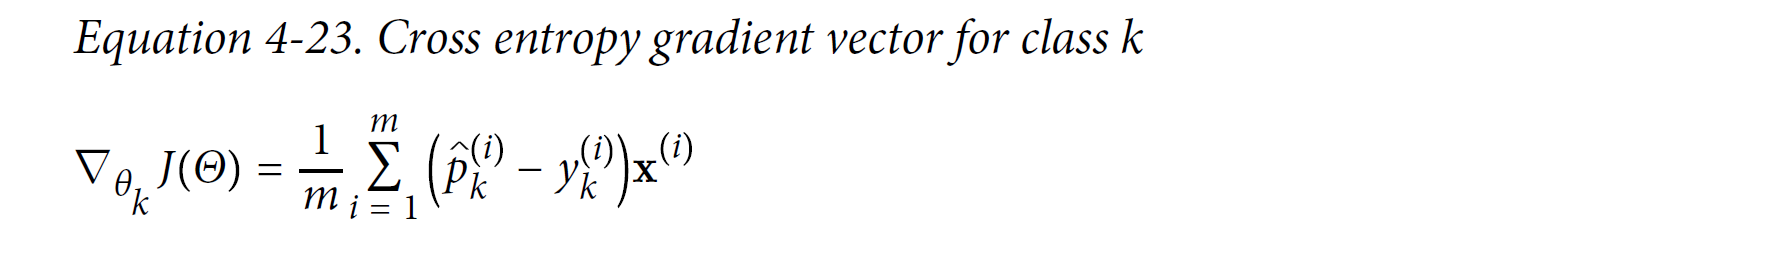

Let’s use Softmax Regression to classify the iris flowers into all three classes.

- Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead.

- You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver 
- It also applies ℓ2 regularization by default, which you can control using the hyperparameter C.

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
y[-5:]

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4));
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica");
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor");
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa");

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap) ;   # predicted class
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)     # predicted prob of Versicolor
plt.clabel(contour, inline=1, fontsize=12);
plt.xlabel("Petal length", fontsize=14);
plt.ylabel("Petal width", fontsize=14);
plt.legend(loc="center left", fontsize=14);
plt.axis([0, 7, 0, 3.5]);
plt.show();

In [ ]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])